In [75]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

In [8]:
data = pd.read_csv('data/likelihood_blogVisits.csv.', names=['t'])
data.head() 

,t
0,1.366967
1,0.065920
2,0.968358
3,0.174096
4,0.889502


### Problem 4.1.4. 
**You collect data from Google Analytics that contains the time (in minutes) be-tween each visit for a sample of 50 randomly chosen visits to your blog. The data set is called likelihood_blogVisits.csv, derive an estimate for the mean number of visits per minute**

We model the time between first time visits (FTVs) using an exponential distribution. In this case the maximum likelihood estimate (MLE) of the $\lambda$ parameter is given by the reciprocal of the average time between events: $$\frac{1}{\bar{t}}$$

In [95]:
mle = 1 / data['t'].mean()
print(f'MLE given data is {mle:.2f} visits per time period')

MLE given data is 1.63 visits per time period


### Problem 4.1.5.
**Graph the log-likelihood near the MLE.**

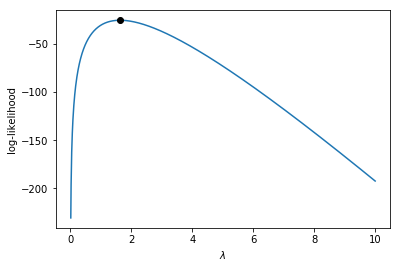

In [111]:
times = list(data['t'])
lambdas = np.linspace(0.01, 10, 999)

# function for calculating probability density ot t given lambda
def exponential_pdf(t, lambd):
    p = lambd * math.exp(-lambd * t)
    return p

# calculate log-likelihoods
likelihoods = []
for lambd in lambdas:
    probs = [exponential_pdf(t, lambd) for t in times]
    loglike = sum(map(math.log, probs))
    likelihoods.append(loglike)

# grab maximum likelihood estimate from all likelihoods
mle_idx = np.argmax(np.array(likelihoods))

# plot
plt.plot(lambdas, likelihoods)
plt.plot(lambdas[mle_idx], likelihoods[mle_idx], 'ko')
plt.xlabel('$\lambda$')
plt.ylabel('log-likelihood')
plt.show();